In [31]:
import numpy as np
import matplotlib.pyplot as plt
import math


# Assignment 1

In [32]:
# Parameters
Pt = 20 # Transmit power (dBm)
Gant_ap = 12 # Antenna gain of access point (dBi)
Gant_mob = 2 # Antenna gain of laptop (dBi)
gamma = 4.5 # Path loss exponent
sigma_s = 7 # Standard deviation of log-normal shadow fading (dB)
d0 = 1.5 # Reference distance (m)
d = 45 # Distance from access point (m)
f = 2412e6 # Frequency (Hz)
c = 3e8 # Speed of light (m/s)

> ### a) Determine the expected value of the received local-mean signal power ,$ P_{r,lm} $ in room HB17.320, at a distance of 45 m from the access point

The received power at a distance $d$ from the access point can be expressed as:

$$Pr(d) = P_t + G_{ant,ap} + G_{ant,mob} - PL(d) + X_{\sigma}  $$

where 
- $Pr(d)$ is the received power at distance $d$
- $P_t$ is the transmit power
- $G_{ant,ap}$ and $G_{ant,mob}$ are the antenna gains of the access point and the mobile device (laptop), respectively
- $PL(d)$ is the path loss at distance $d$
- $X_{\sigma}$ is a log-normal shadow fading random variable with standard deviation $\sigma_s$ 

Assuming free-space path loss at the reference distance $d_0=1.5\ \mathrm{m}$, the path loss at distance $d=45\ \mathrm{m}$ can be calculated as:

$$PL(d) = PL(d_0) + 10\gamma\log_{10}\left(\frac{d}{d_0}\right)$$

where $\gamma$ is the path loss exponent. Using the given parameters, we have:

$$PL(d_0) = 10\log_{10}\left(\frac{4\pi d_0}{\lambda}\right) = 43.6\ \mathrm{dB}$$

where $\lambda = c/f = 0.125\ \mathrm{m}$ is the wavelength of the signal, and $c$ and $f$ are the speed of light and frequency of the signal, respectively. 

Plugging in the values, we get:

$$PL(45) = 43.6 + 10\gamma\log_{10}\left(\frac{45}{1.5}\right)  = 110.1\ \mathrm{dB}$$

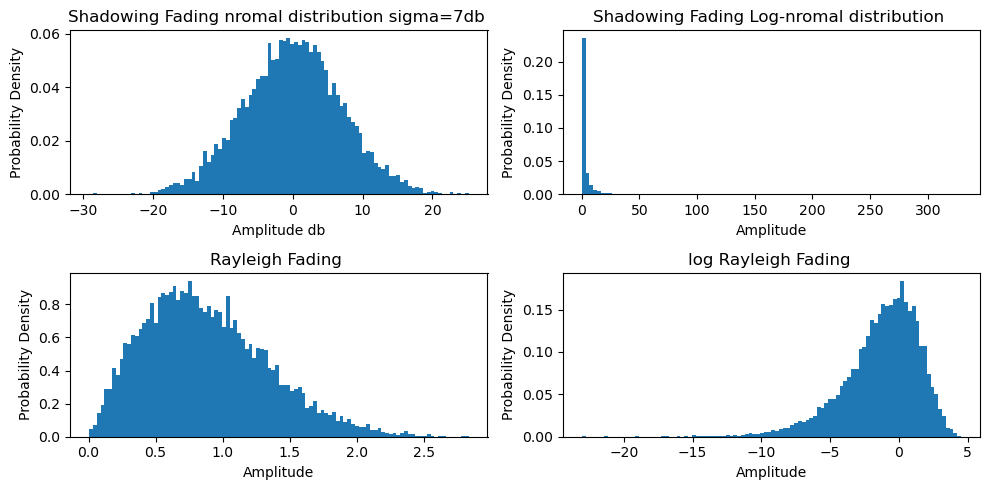

In [33]:
N = 10000
# Generate shadowing fading PDF
shadowing        = np.random.normal(scale=sigma_s, size=N)
shadowing_linear = 10**(0.1*shadowing)
# Generate Rayleigh fading
cos_theta = np.random.normal(scale=np.sqrt(0.5), size=N)
sin_theta = np.random.normal(scale=np.sqrt(0.5), size=N)
rayleigh_fading = np.abs(cos_theta + 1j * sin_theta)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

# Plot shadowing fading PDF
axs[0, 0].hist(shadowing, bins=100, density=True)
axs[0, 0].set_title('Shadowing Fading nromal distribution sigma=7db ')
axs[0, 0].set_xlabel('Amplitude db')
axs[0, 0].set_ylabel('Probability Density')

# Plot shadowing fading log normal distribution PDF
axs[0, 1].hist(shadowing_linear, bins=100, density=True)
axs[0, 1].set_title('Shadowing Fading Log-nromal distribution ')
axs[0, 1].set_xlabel('Amplitude')
axs[0, 1].set_ylabel('Probability Density')

# Plot Rayleigh fading PDF
axs[1, 0].hist(rayleigh_fading, bins=100, density=True)
axs[1, 0].set_title('Rayleigh Fading ')
axs[1, 0].set_xlabel('Amplitude')
axs[1, 0].set_ylabel('Probability Density')

# Plot Log Rayleigh fading log distribution PDF
axs[1, 1].hist(10*np.log10(rayleigh_fading), bins=100, density=True)
axs[1, 1].set_title('log Rayleigh Fading ')
axs[1, 1].set_xlabel('Amplitude')
axs[1, 1].set_ylabel('Probability Density')

# Adjust layout and display plots
fig.tight_layout()
plt.show()

In [34]:
# Free-space path loss at reference distance
PL_d0 = 20 * np.log10(4 * np.pi * d0* f/ c)
print("PL_d0 :{:} dB".format(PL_d0))
# Distance range for path loss curve   1 to 1000 m
d_range = np.linspace(1, 1000,num=1000)
# Path loss at distance d m
PL_d = PL_d0 + 10 * gamma * np.log10(d_range/d0) 
print("PL_d at 45 m:{:} dB".format(PL_d[45-1]))
# Received power at distance d m
Pr_d = Pt + Gant_ap + Gant_mob - PL_d 
print("Pr_d at 45 m:{:} dB".format(Pr_d[45-1]))
# consider shadowing  
Pr_d_shadowing = Pr_d + np.random.normal(scale=sigma_s, size=len(d_range))
print("Pr_d + shadowing at 45 m :{:} dB".format(Pr_d_shadowing[45-1]))

PL_d0 :43.61114343652457 dB
PL_d at 45 m:110.08159989890937 dB
Pr_d at 45 m:-76.08159989890937 dB
Pr_d + shadowing at 45 m :-73.62072036879863 dB


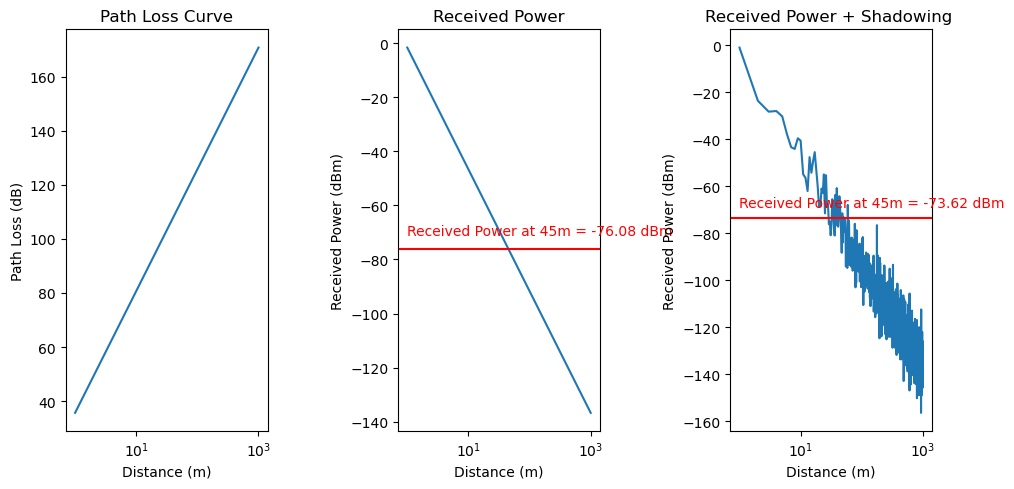

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
# Plot path loss curve
axs[0].plot(d_range, PL_d)
axs[0].set_title('Path Loss Curve')
axs[0].set_xlabel('Distance (m)')
axs[0].set_ylabel('Path Loss (dB)')
axs[0].set_xscale('log')
# Plot received power vs. distance
axs[1].plot(d_range, Pr_d)
axs[1].set_title('Received Power')
axs[1].set_xlabel('Distance (m)')
axs[1].set_ylabel('Received Power (dBm)')
axs[1].set_xscale('log')
axs[1].axhline(y=Pr_d[45-1], color='r', linestyle='-')
axs[1].text(1, Pr_d[45-1]+5, 'Received Power at 45m = {:.2f} dBm'.format(Pr_d[45-1]), color='r')
# Plot received power + Shadowing vs. distance 
axs[2].plot(d_range, Pr_d_shadowing)
axs[2].set_title('Received Power + Shadowing ')
axs[2].set_xlabel('Distance (m)')
axs[2].set_ylabel('Received Power (dBm)')
axs[2].set_xscale('log')
axs[2].axhline(y=Pr_d_shadowing[45-1], color='r', linestyle='-')
axs[2].text(1, Pr_d_shadowing[45-1]+5, 'Received Power at 45m = {:.2f} dBm'.format(Pr_d_shadowing[45-1]), color='r')

# Adjust layout and display plots
fig.tight_layout()
plt.show()


> ### b) Determine the probability that the local-mean received signal power $ Pr(d) $, is less than $ P_{min} $ in room HB17.160, at a distance of 75 m from the access point.

Reference book : Chapter 2.9 ,Outage Probability under Path Loss and Shadowing
$$p(Pr(d) \leq P_{min}) = 1-Q\left(\frac{P_{min} - (P_t +  G_{ant,ap} + G_{ant,mob} -  PL(d))}{\sigma_{\psi}dB}\right)$$

where:
- $P_{min}$ is the minimum received power threshold
- $\sigma_{\psi}dB$ is the standard deviation of the log-normal shadowing.

The Q-function is defined as the probability that a Gaussian random variable X with mean 0 and variance 1 is greater than z:
$$Q(z) = \frac{1}{\sqrt{2\pi}} \int_{z}^{\infty} e^{-y^2/2} dy$$

The conversion between the Q-function and complementary error function is:
$$Q(z) = \frac{1}{2} \mathrm{erfc} \left( \frac{z}{\sqrt{2}} \right)$$

In [36]:
# Received power at distance 75 m
Pr_d = Pt + Gant_ap + Gant_mob - PL_d[75-1] 
P_min = -84 # Received signal power threshold (dBm)
sigma_s = 7 # Standard deviation of log-normal shadow fading (dB)
z =  (P_min - Pr_d )/ sigma_s
outage_prob =  1- 0.5 * math.erfc(z / np.sqrt(2))

print("Pr_d at 75 m:{:} dB".format(Pr_d))
print("Outage probability: {:.2%}".format(outage_prob))

Pr_d at 75 m:-86.06479363164541 dB
Outage probability: 61.60%


> ### In the large laboratory room HB17.130/140, the amplitude fluctuation of the received signal power $P_r$ due to small scale fading is Rayleigh distributed and the local mean value of the received signal power is $Pr(d) = -82$ dBm.
>> ### c) Calculate the outage probability in this laboratory room.


In [37]:
Pr_d =  -82  # local mean value of the received signal power (dbm)
P_min = -84  # Received signal power threshold (dBm)
z =  (P_min - Pr_d )/ sigma_s
outage_prob =  1 - 0.5 * math.erfc(z / np.sqrt(2))
print("Outage probability: {:.2%}".format(outage_prob))

Outage probability: 38.75%


> ### In order to improve the reception performance the application of antenna diversity is investigated.Since our laptop is equipped with a single antenna, it is moved to different locations within laboratory room HB17.130/140.
>> ### d) Determine the probability that we find at least one location with sufficient signal strength when we try at four randomly selected locations.

As solved in question $c , the outage probability in this laboratory room is 38.75% , we define it as:  
$$p$$ 

The probability that all four randomly selected locations have insufficient signal strength can be calculated as:

$$ p^4  $$

Therefore, the probability of finding at least one location with sufficient signal strength can be calculated as:

$$ p_{at\ least\ one\ location} = 1 - p^4 $$

In [38]:
P_least =  1 - outage_prob**4  

print("the probability of finding at least one location with sufficient signal strength: {:.2%}".format(P_least))

the probability of finding at least one location with sufficient signal strength: 97.74%


> ### e) 

>> ### 1. Explain the principle of operation of Maximal Ratio Combining (use no more than 50 words)
MRC combines multiple independant branch with different weights that are proportional to the SNR or Channel gain of each branch.

>> ###  2. Clearly indicate and motivate what you expect for the obtained SNR in case Maximal Ratio Combining is used and in case Selection Diversity is used, with the same number of diversity branches and further under identical conditions (use no more than 50 words).

In MRC, the output SNR is the sum of the SNRs of all branches, which increases linearly with the number of diversity branches. But, in SC, the output SNR is equal to the SNR of the selected branch, which increases with the number of branches but not linearly.

# Assignment 2

The single sided power spectral density of a modulated data signal with rectangular pulses can be calculated using the following formula:

$$S(f) = PT( sinc (\pi (f - f _{c}) T))^2 $$

where:
- P is the signal power
- T is the pulse duration time
- f is the frequency
- f_c is the carrier frequency

> ### a) Calculate the received power spectral density (in dBm/Hz) at the carrier frequency of:

>> ### the 16-QAM modulated signal if no DS-SS is used

In [39]:
m      = 4              # 16-QAM . each symbol contain log2(16) =  4 bits / symbol  
R_b    = 2e6            # bit rate 2Mbit/s 
R_s    = R_b/m          # symbol rate : symbol /s 
T_s    = 1/R_s          # symbol duration time 
f_c    = 2.4e9          # carriar frequency Hz 
P_dB   = -60            # signal power dbm 

In [40]:
S_fc = P_dB*T_s *(np.sinc(0))**2  
print("DS-SS unused  PSD at f_c:{:} dBm/hz".format(S_fc))  # dBm /Hz

DS-SS unused  PSD at f_c:-0.00011999999999999999 dBm/hz


>> ### the 16-QAM modulated signal with DS-SS

- If DS-SS is used, the processing gain is the ratio of the spread spectrum bandwidth to the original bandwidth. The spread spectrum bandwidth is the chip rate, which is 11 MHz. The original bandwidth is the bandwidth of the 16-QAM signal, which is the same as the bit rate divided by the number of bits per symbol, or 2 MHz/4 = 0.5 MHz. So the processing gain is:

$$G = \frac{B_{c}}{B} = \frac{11 \text{ MHz}}{0.5 \text{ MHz}} = 22 = \frac{T}{T_{c}}$$


The transmitted signal $\tilde{s}(t)$ is an ergodic random process and the power spectral density can be found from the Fourier Transform of the autocorrelation function. 

$$\tilde{s}(t) = \sqrt{P} a(t) b(t)$$

where $a(t)$ and $b(t)$ are the  spreading sequence signal and original sequence signal  respectively .

Since the spreading sequence    and original sequence  are independent, the autocorrelation function of the transmit signal is the multiplication of the autocorrelation functions of the two signals. That is,

\begin{align}
R_s(\tau) &= E\{s^\sim(t)\tilde{s}^*(t+\tau)\} \\
          &= E\{a(t)b(t)a(t+\tau)b(t+\tau)\} \\
          &= E\{a(t)a(t+\tau)\} E\{b(t)b(t+\tau)\} \\
          &= R_a(\tau)R_b(\tau)
\end{align}

The power spectral density is then the Fourier Transform of the autocorrelation function:

\begin{align}
S(f) &=\int_{-\infty}^{\infty}S_b(\varphi)S_a(f-\varphi)\,d\varphi \\
     &=\int_{-\infty}^{\infty}PT\operatorname{sinc}^2( \pi(\varphi - f_c )T)PT_c\operatorname{sinc}^2( \pi (f-\varphi - f_c)T_c)\\
\end{align}

we know that $T_c = \frac{T}{G}$
\begin{align}
S(f) &=\int_{-\infty}^{\infty}PT\operatorname{sinc}^2( \pi(\varphi - f_c )T)\frac{PT}{G}\operatorname{sinc}^2( \pi (f -\varphi - f_c )\frac{T}{G})\\
     &\approx \frac{PT}{G}\operatorname{sinc}^2( \pi (f - f_c )\frac{T}{G})\int_{-\infty}^{\infty}PT\operatorname{sinc}^2( \pi(\varphi - f_c )T)\\
     &\approx \frac{PT}{G}\operatorname{sinc}^2( \pi (f - f_c )\frac{T}{G})
\end{align}

Examining the first line in above equation , due to factor G, the second term will be approximately constant over the significant values of the first term. so we could put second term outside the intergral .

let $f = f_c$
$$
S(f_c) \approx \frac{PT}{G}\operatorname{sinc}^2( \pi (f_c - f_c )\frac{T}{G}) = \frac{PT}{G}
$$


In [41]:
R_spread = 11e6
G = R_spread / R_s
print("Processing gain :{:} ".format(G))  
S_fc_DSSS = (P_dB*T_s *(np.sinc(0))**2  )/G

print("DS-SS used  PSD at f_c:{:} dBm/hz".format(S_fc_DSSS))  # dBm /Hz

Processing gain :22.0 
DS-SS used  PSD at f_c:-5.4545454545454545e-06 dBm/hz


> ### b) Explain why/how DS-SS creates robustness against narrowband interference.

DS-SS spreads the interference power over a wide bandwidth at the receiver through the despreading operation. Then , the demodulation of the modulated signal acts as a lowpass filter, attenuating the interference and reducing its power by the processing gain . This creates robustness against narrowband interference in DS-SS.

> ### In WLAN 802.11, a fixed spreading sequence of eleven (11) symbols is used. This so-called Barker sequence consists of the following symbols:
> ###  +1, -1, +1, +1, -1, +1, +1, +1, -1, -1, -1

>> ### c) Show and motivate whether the Barker sequence has good auto-correlation properties.

The auto-correlation function of the Barker sequence can be calculated as:
$$R_{cc}(\tau) = \sum_{n=0}^{10}c(n)c(n+\tau)$$

In [42]:
# Define Barker sequence
c = np.array([1, -1, 1, 1, -1, 1, 1, 1, -1, -1, -1])

# Calculate auto-correlation
R_cc = np.correlate(c, c, mode='full')

# Display results
print("Auto-correlation of Barker sequence:")
print(R_cc)

Auto-correlation of Barker sequence:
[-1  0 -1  0 -1  0 -1  0 -1  0 11  0 -1  0 -1  0 -1  0 -1  0 -1]


This result shows that the auto-correlation function of the Barker sequence has a very sharp peak at $\tau=0$, and all other lags have zero or near-zero values, indicating that the sequence has excellent auto-correlation properties. This property makes the Barker sequence useful for synchronization purposes in WLAN 802.11, as it allows for accurate timing synchronization of the transmitted signal.

> ### In the IEEE 802.11b standard, the data rate for DS-SS is increased by applying Complementary Code Keying (CCK)

>> ### d) Explain the principle behind CCK.

CCK modulation is a technique used in IEEE 802.11b to increase the data rate of DSSS transmission. In CCK, data is encoded using four phase shifts, namely phi1, phi2, phi3, and phi4, which are applied to each of the eight chips in a symbol. These phase shifts are chosen based on the bits being modulated, and they are uniquely determined in such a way that the resulting symbol is unique to the data being transmitted.

At the receiver, the same set of four phase shifts is used to regenerate the transmitted symbol and recover the original data. The receiver uses a simple correlator to exploit the orthogonality of QPSK symbols and demodulate the differentially encoded signal. This allows the receiver to detect and correct any errors in the transmission.